<a href="https://colab.research.google.com/github/devvashisth07/early-event-detection/blob/main/EED_for_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Split the data into features (X) and the target variable (y)
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.75
Confusion Matrix:
[[33  2]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



Summary Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.00

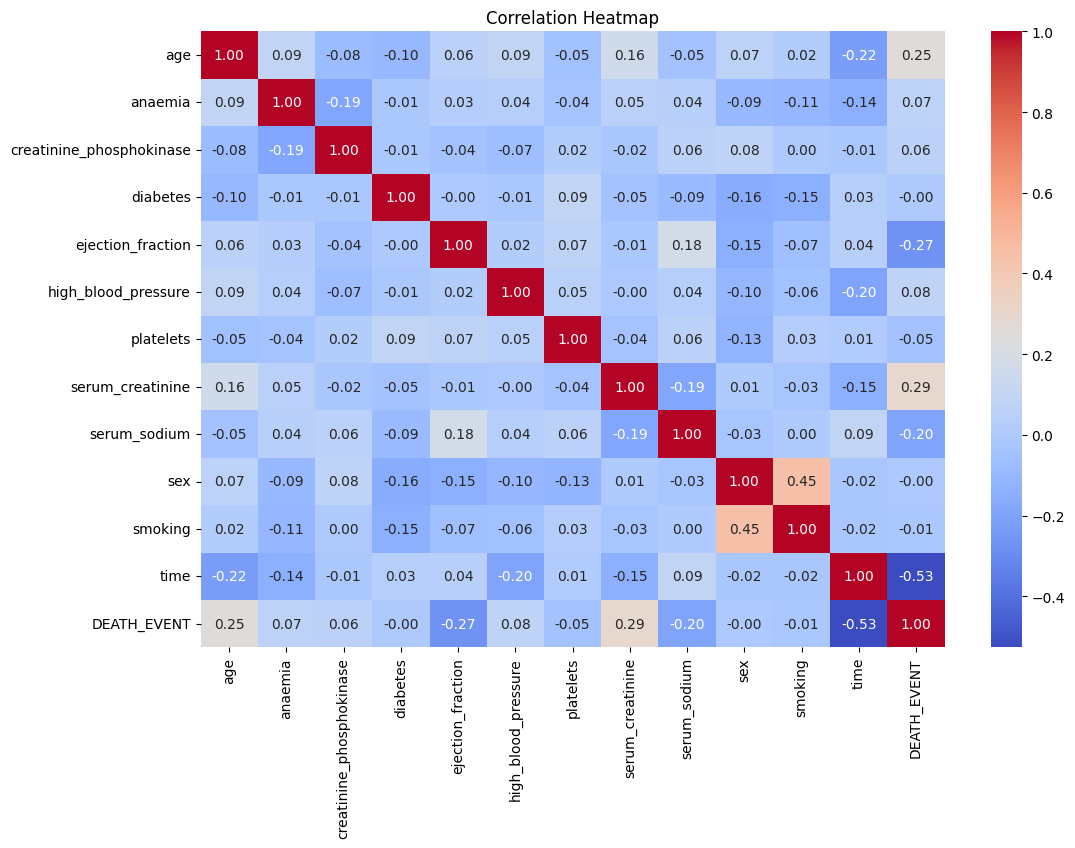

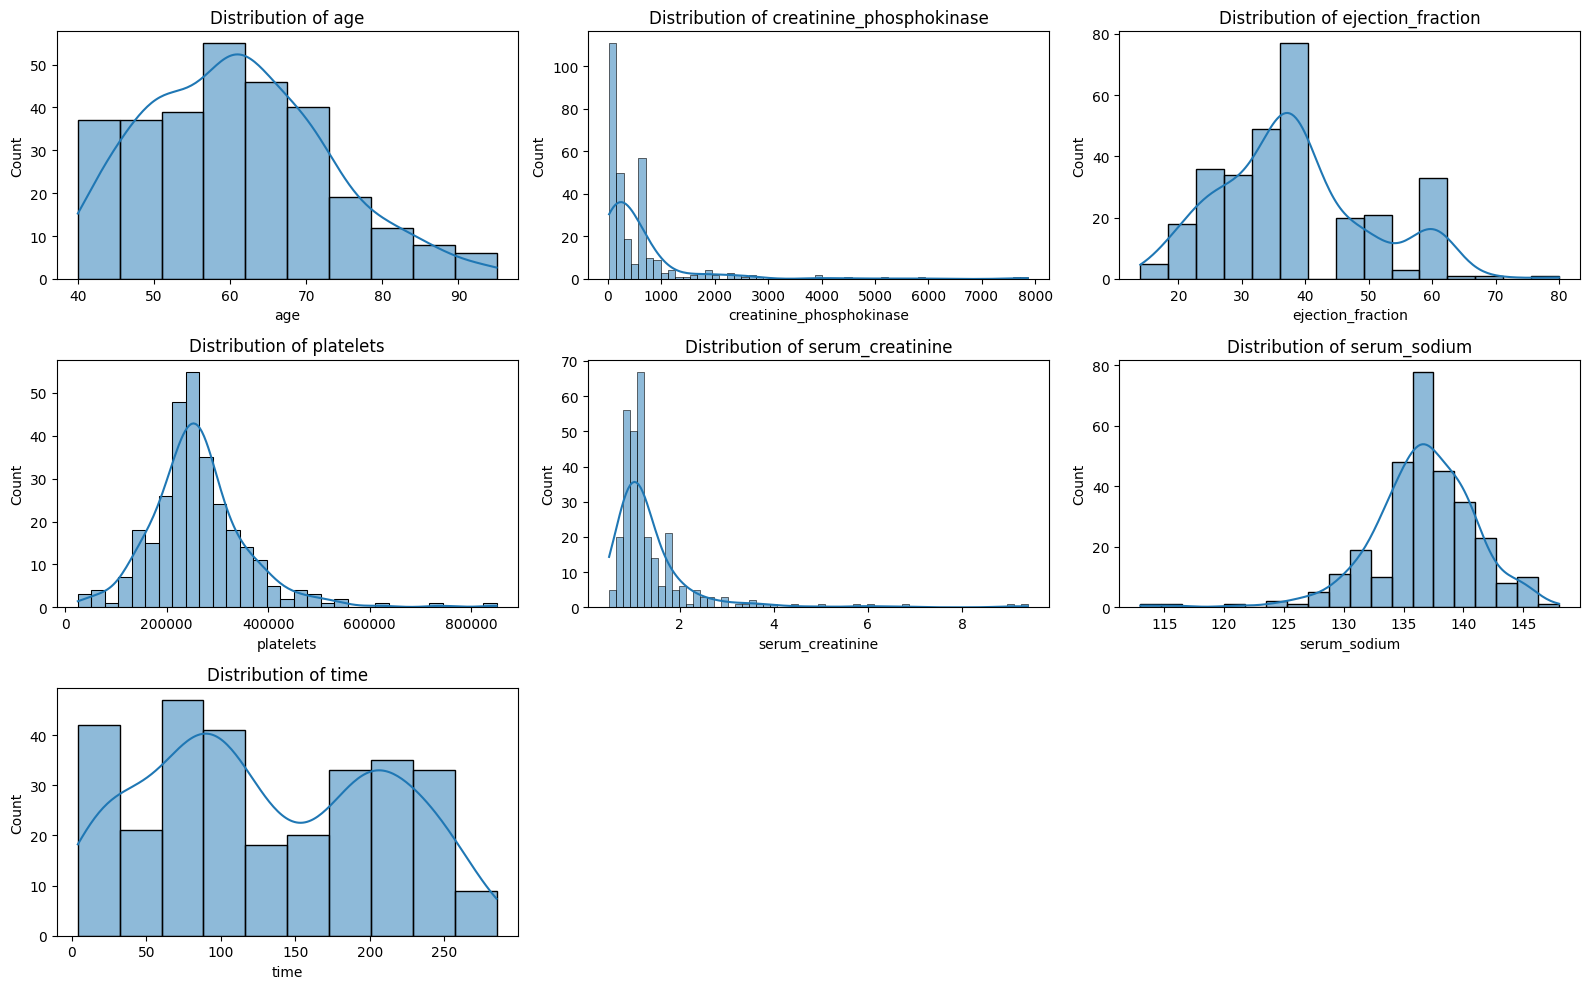

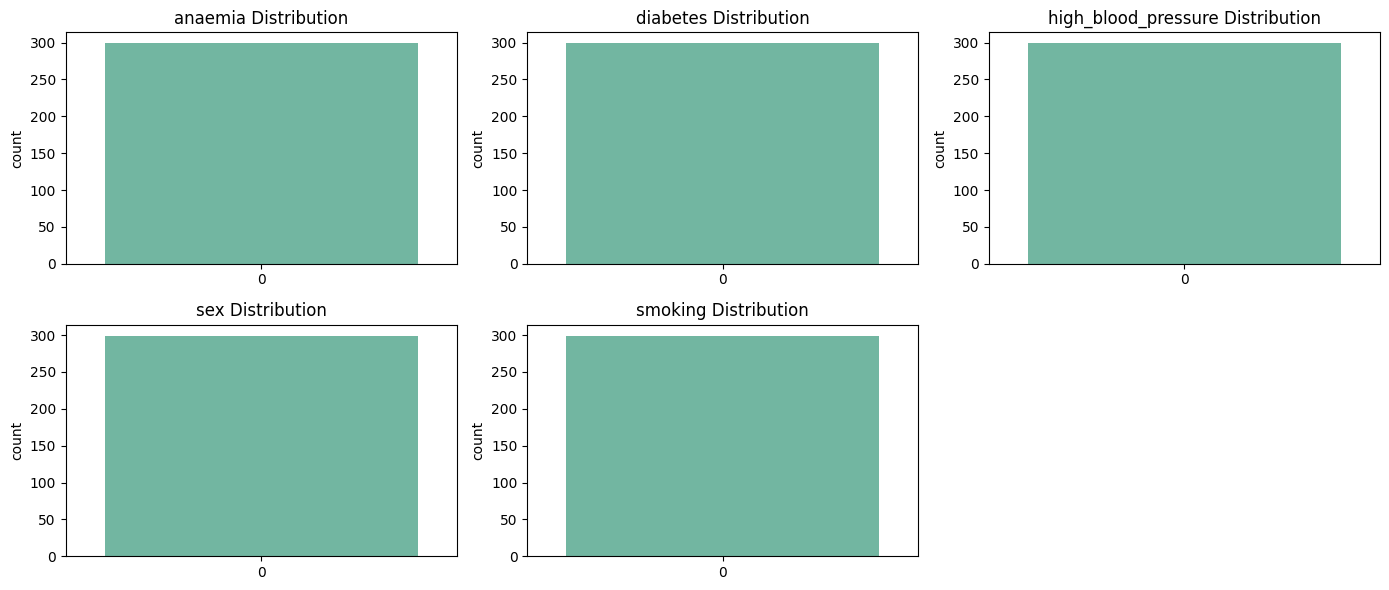

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Display basic statistics about the dataset
print("Summary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Explore the distribution of the target variable
print("\nDistribution of DEATH_EVENT:")
print(data['DEATH_EVENT'].value_counts())

# Visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Explore the distribution of numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Explore categorical features
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data[feature], palette='Set2')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


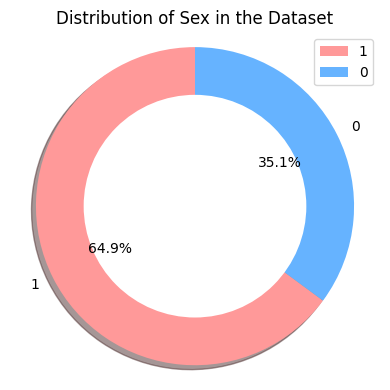

In [6]:
# Group the data by 'sex' and count the occurrences of each category
sex_counts = data['sex'].value_counts()

# Create a custom color palette for the pie chart slices
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Add a central circle to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title and legend
plt.title("Distribution of Sex in the Dataset")
plt.legend(labels=sex_counts.index, loc='upper right')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the pie chart
plt.tight_layout()
plt.show()

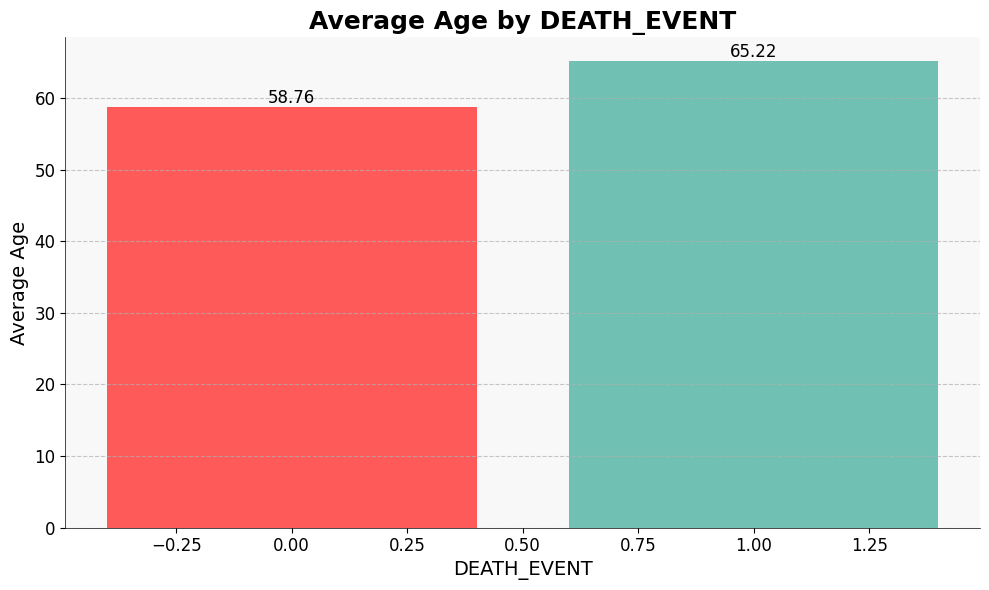

In [7]:
age_by_death_event = data.groupby('DEATH_EVENT')['age'].mean()


colors = ['#FF5A5A', '#70C1B3']


plt.figure(figsize=(10, 6))
ax = plt.bar(age_by_death_event.index, age_by_death_event, color=colors)


for i, bar in enumerate(ax):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{age_by_death_event[i]:.2f}', ha='center', va='bottom', fontsize=12)


plt.title('Average Age by DEATH_EVENT', fontsize=18, fontweight='bold')
plt.xlabel('DEATH_EVENT', fontsize=14)
plt.ylabel('Average Age', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#F8F8F8')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.tight_layout()


plt.show()

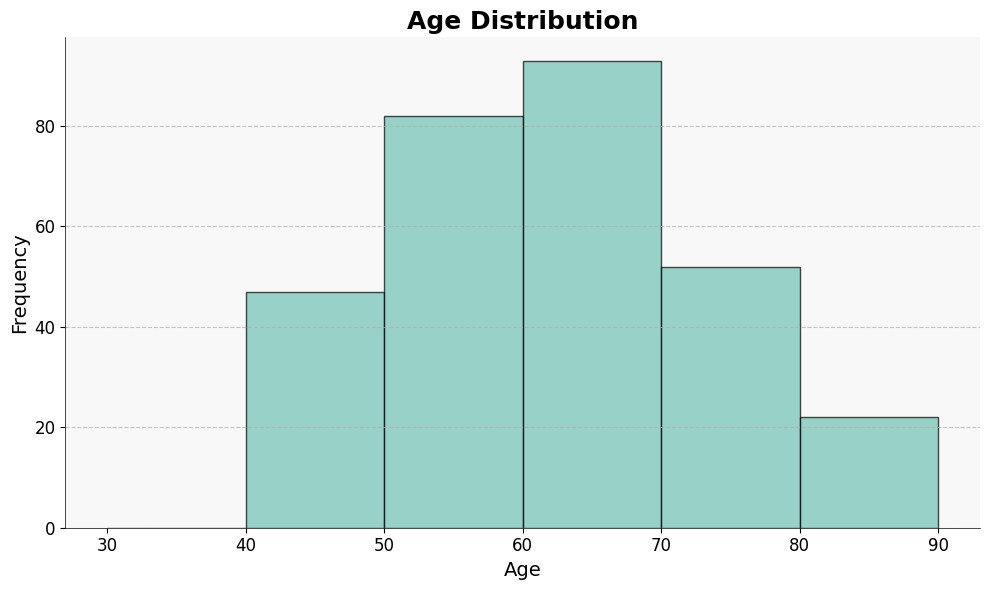

In [8]:
age_data = data['age']


plt.figure(figsize=(10, 6))


bins = [30, 40, 50, 60, 70, 80, 90]


plt.hist(age_data, bins=bins, edgecolor='black', color='#70C1B3', alpha=0.7)

plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#F8F8F8')


# Remove unnecessary spines and set the layout
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.tight_layout()


plt.show()

In [9]:
from sklearn.feature_selection import SelectKBest, chi2



# Split the data into features (X) and target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Create a SelectKBest object with chi2 scoring function (k is the number of features to select)
k_best = SelectKBest(score_func=chi2, k=5)


# Fit the SelectKBest object on the data and transform it to get the selected features
X_k_best = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'time'],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Support Vector Machine Classifier
my_model = LogisticRegression()
my_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
my_model.score(X_test, y_test)

0.8666666666666667

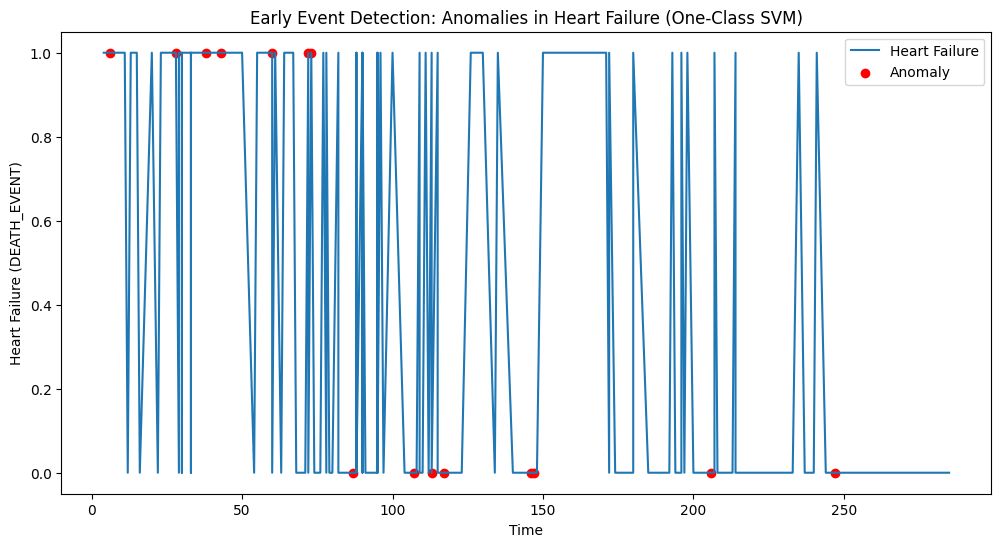

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
31   85.0        0                        23         0                 45   
46   51.0        0                      1380         0                 25   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
72   85.0        0                      5882         0                 35   
75   60.0        1                        47         0                 20   
103  42.0        0                      5209         0                 30   
134  81.0        0                      4540         0                 35   
147  64.0        0                      1610         0                 60   
151  62.0        0                        30         1                 60   
171  52.0        0                      3966         0                 40   

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Assuming the 'time' column represents time steps, sort the data by time
data.sort_values(by='time', inplace=True)

# Select relevant features for anomaly detection
features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

# Create a feature matrix
X = data[features].values

# Fit a One-Class SVM model for anomaly detection
model = OneClassSVM(nu=0.05)  # Adjust the nu parameter as needed
model.fit(X)

# Predict anomalies (early event detection)
anomalies = model.predict(X)

# Add the anomaly predictions to the dataset
data['anomaly'] = anomalies

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['DEATH_EVENT'], label='Heart Failure')
plt.scatter(data[data['anomaly'] == -1]['time'], data[data['anomaly'] == -1]['DEATH_EVENT'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Heart Failure (DEATH_EVENT)')
plt.legend()
plt.title('Early Event Detection: Anomalies in Heart Failure (One-Class SVM)')
plt.show()

# Identify and further analyze the anomalies
early_event_anomalies = data[data['anomaly'] == -1]

# Print or analyze early event anomalies as needed
print(early_event_anomalies)



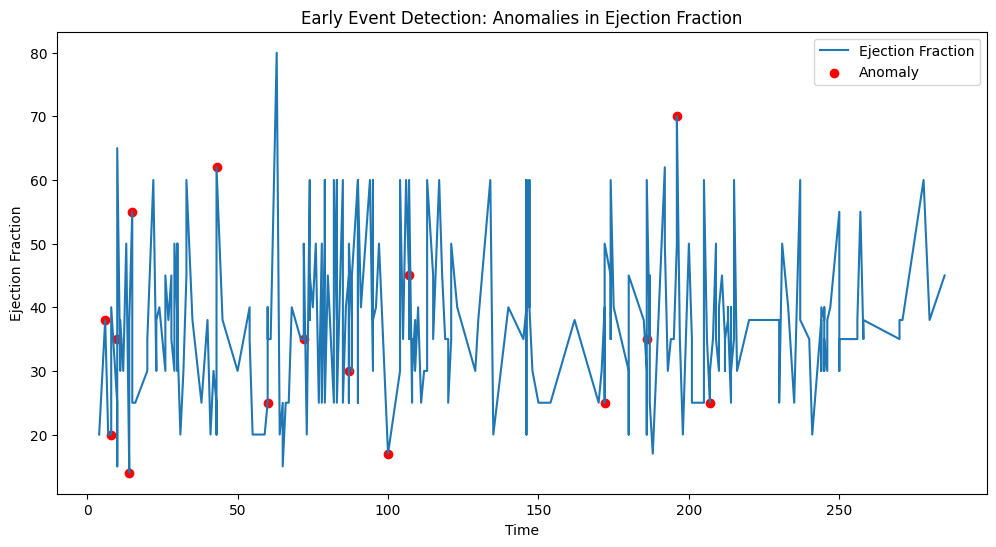

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
4    65.0        1                       160         1                 20   
9    80.0        1                       123         0                 35   
17   45.0        0                       582         0                 14   
19   48.0        1                       582         1                 55   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
72   85.0        0                      5882         0                 35   
103  42.0        0                      5209         0                 30   
126  46.0        0                       168         1                 17   
131  60.0        1                      1082         1                 45   
187  60.0        0                      1896         1                 25   

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Assuming the 'time' column represents time steps, sort the data by time
data.sort_values(by='time', inplace=True)

# Select relevant features for anomaly detection
features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

# Create a feature matrix
X = data[features].values

# Fit an Isolation Forest model for anomaly detection
model = IsolationForest( contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies (early event detection)
anomalies = model.predict(X)

# Add the anomaly predictions to the dataset
data['anomaly'] = anomalies

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['ejection_fraction'], label='Ejection Fraction')
plt.scatter(data[data['anomaly'] == -1]['time'], data[data['anomaly'] == -1]['ejection_fraction'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.title('Early Event Detection: Anomalies in Ejection Fraction')
plt.show()

# Identify and further analyze the anomalies
early_event_anomalies = data[data['anomaly'] == -1]

# Print or analyze early event anomalies as needed
print(early_event_anomalies)


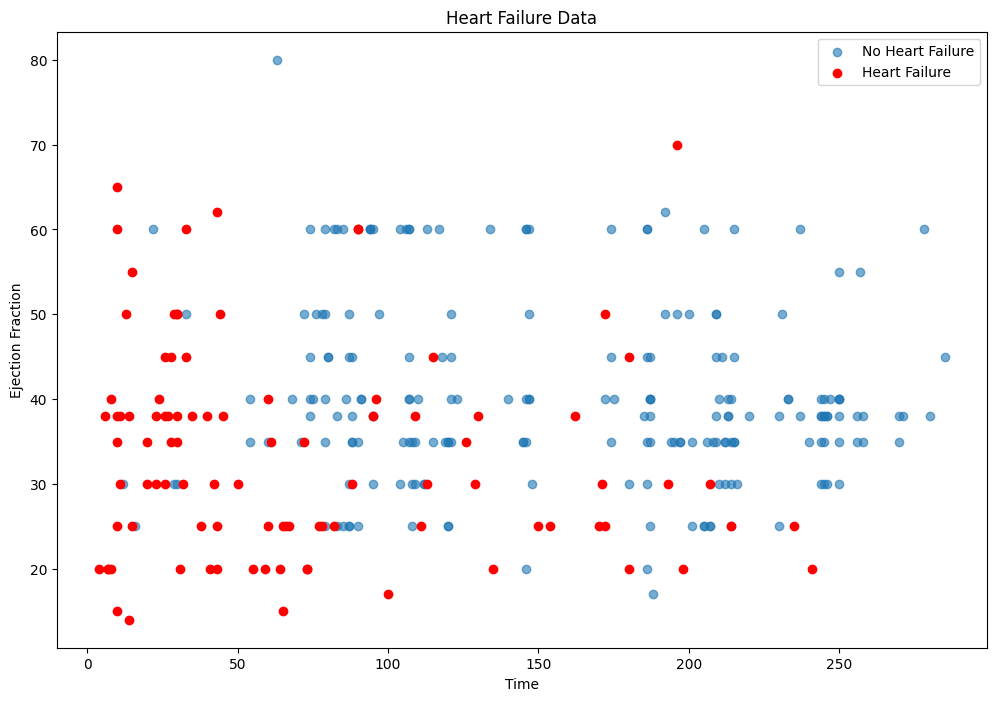

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Separate the data into two groups: heart failure and no heart failure
heart_failure = data[data['DEATH_EVENT'] == 1]
no_heart_failure = data[data['DEATH_EVENT'] == 0]

# Plot the data points, marking heart failure cases in red
plt.figure(figsize=(12, 8))
plt.scatter(no_heart_failure['time'], no_heart_failure['ejection_fraction'], label='No Heart Failure', alpha=0.6)
plt.scatter(heart_failure['time'], heart_failure['ejection_fraction'], label='Heart Failure', color='red')
plt.xlabel('Time')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.title('Heart Failure Data')
plt.show()


In [16]:
pip install plotly


In [17]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Create a scatter plot using Plotly Express
fig = px.scatter(data, x="time", y="ejection_fraction", color="DEATH_EVENT",
                 labels={"time": "Time", "ejection_fraction": "Ejection Fraction"},
                 title="Heart Failure Data")

# Customize the color scale
fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

# Set colors for heart failure and no heart failure
fig.update_traces(marker=dict(color='red'), selector=dict(marker=dict(color=1)))

# Show the plot
fig.show()
